# PyTorch로 시작하는 딥러닝 입문 : DL 입문

### 06-03 XOR 문제 - 단층 퍼셉트론 구현하기
이번 챕터에서는 파이토치를 사용해서 단층 퍼셉트론을 구현하여 XOR 문제를 풀어보는 것을 시도해보겠습니다.


<br>


#### 1. 파이토치로 단층 퍼셉트론 구현하기

In [1]:
import torch

In [2]:
# 만약 GPU 연산이 가능할 경우 GPU 연산을 할 수 있도록 설정한다.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

이제 XOR 문제에 해당되는 입력과 출력을 정의합니다.

In [3]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

이제 1개의 뉴런을 가지는 단층 퍼셉트론을 구현해봅시다. 단층 퍼셉트론이 처음 소개되었을 때는 계단 함수였지만, 우리는 이미 또 다른 활성화 함수인 시그모이드 함수를 알고 있으므로 시그모이드 함수를 사용해보겠습니다.

In [5]:
import torch.nn as nn

linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

0 또는 1을 예측하는 이진 분류 문제이므로, 비용 함수로는 크로스엔트로피 함수를 사용합니다.
nn.BCELoss()는 이진 분류에서 사용하는 크로스엔트로피 함수입니다.

In [7]:
# 비용 함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [8]:
#10,001번 epoch 수행. 0번 epoch부터 10,000번 epoch까지
for step in range(10001):
  optimizer.zero_grad()
  hypothesis = model(X)

  # 비용 함수
  cost = criterion(hypothesis, Y) # (cost)Loss 계산
  cost.backward() # Loss함수 역전파로 gradient 계산
  optimizer.step() # SGD하며 파라미터 업데이트

  if step % 100 == 0: # 100번째 epoch마다 cost 출력
    print(step, cost.item())

0 0.7273973822593689
100 0.6931476593017578
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

200번 에포크에 비용이 0.6931471824645996가 출력된 이후에는 10,000번 에포크가 되는 순간까지 더 이상 비용이 줄어들지 않습니다. 이는 단층 퍼셉트론은 XOR 문제를 풀 수 없기 때문입니다.

### 2. 학습된 단층 퍼셉트론의 예측값 확인하기
총 10,001회 학습한 단층 퍼셉트론의 예측값도 확인해보겠습니다.

In [9]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


### 06-05 XOR 문제 - 다층 퍼셉트론 구현하기
이번 챕터에서는 파이토치를 사용해서 다층 퍼셉트론을 구현하여 XOR 문제를 풀어보는 것을 시도해보겠습니다.

In [10]:
import torch
import torch.nn as nn

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

XOR 문제를 풀기 위한 입력과 출력을 정의해줍니다.

In [12]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

이제 다층 퍼셉트론을 설계합니다. 아래는 입력층, 은닉층1, 은닉층2, 은닉층3, 출력층을 가지는 은닉층이 3개인 인공 신경망입니다.

In [13]:
model = nn.Sequential(
    nn.Linear(2, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 1, bias=True),
    nn.Sigmoid()
).to(device)

이제 비용 함수와 옵타마이저를 선언합니다. nn.BCELoss()는 이진 분류에서 사용하는 크로스엔트로피 함수입니다.

In [14]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

총 10,001번의 에포크를 수행합니다. 각 에포크마다 역전파가 수행된다고 보면 되겠습니다.

In [15]:
for epoch in range(10001):
  optimizer.zero_grad()
  hypothesis = model(X)

  cost = criterion(hypothesis, Y) #Loss(cost) 계산
  cost.backward() # 역전파로 gradient 구하고
  optimizer.step() # 구한 gradient로 업데이트 (SGD)

  if epoch % 100 == 0:
    print(epoch, cost.item())

0 0.6948983073234558
100 0.693155825138092
200 0.6931535005569458
300 0.6931513547897339
400 0.693149209022522
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931361556053162
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931197047233582
2000 0.6931172609329224
2100 0.6931145191192627
2200 0.6931115984916687
2300 0.6931084990501404
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930879950523376
2900 0.6930825114250183
3000 0.6930763721466064
3100 0.6930692791938782
3200 0.6930612325668335
3300 0.6930519342422485
3400 0.6930410861968994
3500 0.6930283904075623
3600 0.6930132508277893
3700 0.6929951906204224
3800 0.6929728984832764
3900 0.6929453015327454
4000 0.6929103136062622
4100 0.6928649544715881
4200 0

### 2. 학습된 다층 퍼셉트론의 예측값 확인하기
이제 모델이 XOR 문제를 풀 수 있는지 테스트 해봅시다.

In [16]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.1174576e-04]
 [9.9982870e-01]
 [9.9984229e-01]
 [1.8542419e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


06-06 비선형 활성화 함수(Activation function)
비선형 활성화 함수(Activation function)는 입력을 받아 수학적 변환을 수행하고 출력을 생성하는 함수입니다. 앞서 배운 시그모이드 함수나 소프트맥스 함수는 대표적인 활성화 함수 중 하나입니다.

이번 챕터에서는 인공 신경망의 은닉층에서 왜 활성화 함수로 시그모이드(sigmoid) 함수를 사용하는 것을 왜 지양해야 하는지와 은닉층에서 주로 사용되는 함수인 렐루(ReLU) 함수를 소개하고 그 외의 다른 활성화 함수들에 대해서도 소개합니다.

In [17]:
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

활성화 함수의 특징은 선형 함수가 아닌 비선형 함수여야 한다는 점입니다. 선형 함수란 출력이 입력의 상수배만큼 변하는 함수를 선형함수라고 합니다. 예를 들어
라는 함수가 있을 때, W와 b는 상수입니다. 이 식은 그래프를 그리면 직선이 그려집니다. 반대로 비선형 함수는 직선 1개로는 그릴 수 없는 함수를 말합니다.

인공 신경망의 능력을 높이기 위해서는 은닉층을 계속해서 추가해야 합니다. 그런데 만약 활성화 함수로 선형 함수를 사용하게 되면 은닉층을 쌓을 수가 없습니다. 예를 들어 활성화 함수로 선형 함수를 선택하고, 층을 계속 쌓는다고 가정해보겠습니다. 활성화 함수는
라고 가정합니다. 여기다가 은닉층을 두 개 추가한다고하면 출력층을 포함해서
가 됩니다. 이를 식으로 표현하면
입니다. 그런데 이는 잘 생각해보면
의 세 제곱값을
라고 정의해버리면
와 같이 다시 표현이 가능합니다. 즉, 선형 함수로는 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이를 줄 수 없습니다.

선형 함수를 사용한 은닉층을 1회 추가한 것과 연속으로 추가한 것이 차이가 없다는 뜻이지, 선형 함수를 사용한 층이 아무 의미가 없다는 뜻이 아닙니다. 학습 가능한 가중치가 새로 생긴다는 점에서 분명히 의미가 있습니다. 이와 같이 선형 함수를 사용한 층을 활성화 함수를 사용하는 은닉층과 구분하기 위해서 선형층(linear layer)이나 투사층(projection layer) 등의 다른 표현을 사용하여 표현하기도 합니다. 활성화 함수를 사용하는 일반적인 은닉층을 선형층과 대비되는 표현을 사용하면 비선형층(nonlinear layer)입니다.

## 2. 시그모이드 함수(Sigmoid function)와 기울기 소실
시그모이드 함수를 사용한 어떤 인공 신경망이 있다고 가정해보겠습니다.
위 인공 신경망의 학습 과정은 다음과 같습니다. 우선 인공 신경망은 입력에 대해서 순전파(forward propagation) 연산을 하고, 그리고 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산하고, 그리고 이 손실(loss)을 미분을 통해서 기울기(gradient)를 구하고, 이를 통해 역전파(back propagation)를 수행합니다.

그리고 시그모이드 함수의 문제점은 미분을 해서 기울기(gradient)를 구할 때 발생합니다.

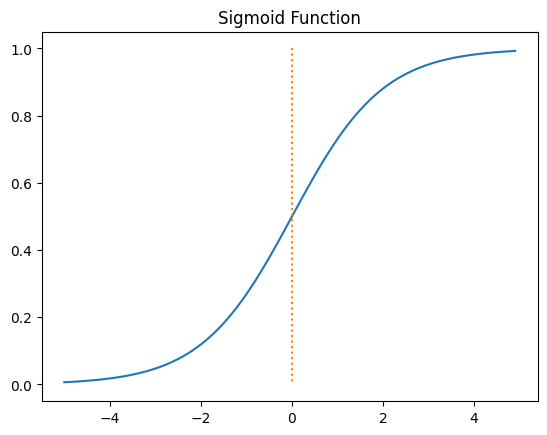

In [18]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위의 그래프는 시그모이드 함수의 그래프를 보여줍니다. 위 그래프를 시그모이드 함수의 출력값이 0 또는 1에 가까워지면, 그래프의 기울기가 완만해지는 모습을 볼 수 있습니다.
이런 끝에 값들, 기울기가 완만한 구역의 값들을의 기울기를 계산하면 0에 가가운 아주 작은 값이 나오게 됩니다.
그런데 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않게 됩니다. 이러한 현상을 기울기 소실(Vanishing Gradient) 문제라고 합니다.
시그모이드 함수를 사용하는 은닉층의 개수가 다수가 될 경우에는 0에 가까운 기울기가 계속 곱해지면 앞단에서는 거의 기울기를 전파받을 수 없게 됩니다. 다시 말해 매개변수
가 업데이트 되지 않아 학습이 되지를 않습니다.


<br>
<br>

## 3. 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)
하이퍼볼릭탄젠트 함수(tanh)는 입력값을 -1과 1사이의 값으로 변환합니다. 그래프를 그려보겠습니다.

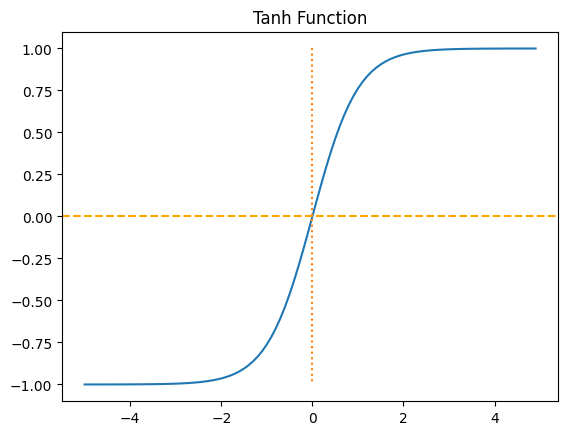

In [19]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

하이퍼볼릭탄젠트 함수도 -1과 1에 가까운 출력값을 출력할 때, 시그모이드 함수와 같은 문제가 발생합니다. 그러나 하이퍼볼릭탄젠트 함수의 경우에는 시그모이드 함수와는 달리 0을 중심으로 하고 있는데, 이때문에 시그모이드 함수와 비교하면 반환값의 변화폭이 더 큽니다. 그래서 시그모이드 함수보다는 기울기 소실 증상이 적은 편입니다. 그래서 은닉층에서 시그모이드 함수보다는 많이 사용됩니다

<br>
<br>

## 4. 렐루 함수(ReLU)
인공 신경망에서 가장 최고의 인기를 얻고 있는 함수입니다

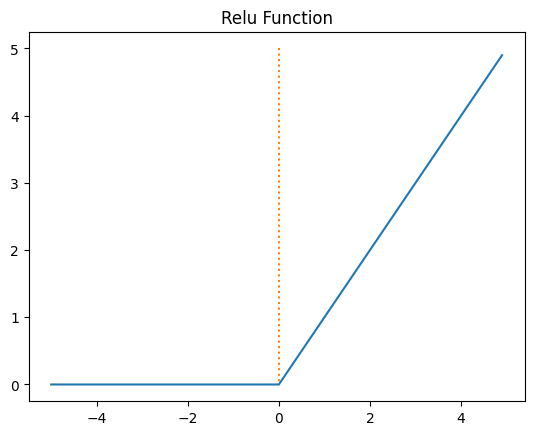

In [20]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환합니다. 렐루 함수는 특정 양수값에 수렴하지 않으므로 깊은 신경망에서 시그모이드 함수보다 훨씬 더 잘 작동합니다. 뿐만 아니라, 렐루 함수는 시그모이드 함수와 하이퍼볼릭탄젠트 함수와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도도 빠릅니다.

하지만 여전히 문제점이 존재하는데, 입력값이 음수면 기울기도 0이 됩니다. 그리고 이 뉴런은 다시 회생하는 것이 매우 어렵습니다. 이 문제를 죽은 렐루(dying ReLU)라고 합니다.

<br>
<br>

## 5. 리키 렐루(Leaky ReLU)
죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장하기 시작했습니다. 변형 함수는 여러 개가 있지만 여기서는 Leaky ReLU에 대해서만 소개합니다. Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환하도록 되어있습니다.

In [21]:
a = 0.1

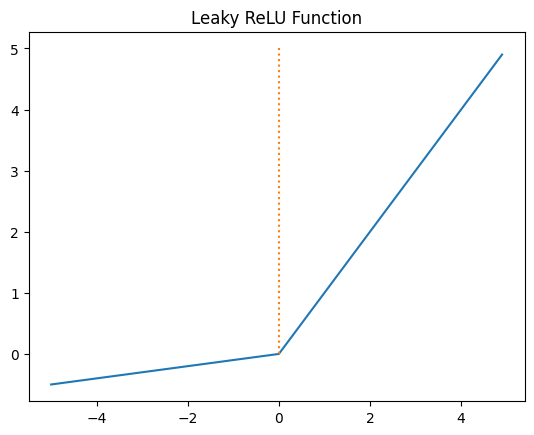

In [22]:
def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

## 6. 소프트맥스 함수(Softamx function)
은닉층에서 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적이지만 그렇다고 해서 앞서 배운 시그모이드 함수나 소프트맥스 함수가 사용되지 않는다는 의미는 아닙니다. 분류 문제를 로지스틱 회귀와 소프트맥스 회귀를 출력층에 적용하여 사용합니다.

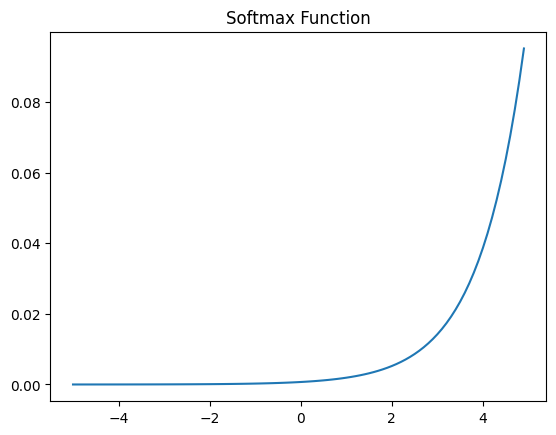

In [23]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

## 7. 출력층의 활성화 함수와 오차 함수의 관계
은닉층의 활성화 함수로는 ReLU 또는 Leaky ReLU와 같은 ReLU의 변형을 사용하라고 정리해봤습니다. 그렇다면 출력층은 어떨까요? 각 문제에 따른 출력층의 활성화 함수와 비용 함수의 관계를 정리해보면 다음과 같습니다. 이 외에도 다중 레이블 분류도 있지만 여기서는 다루지 않겠습니다.
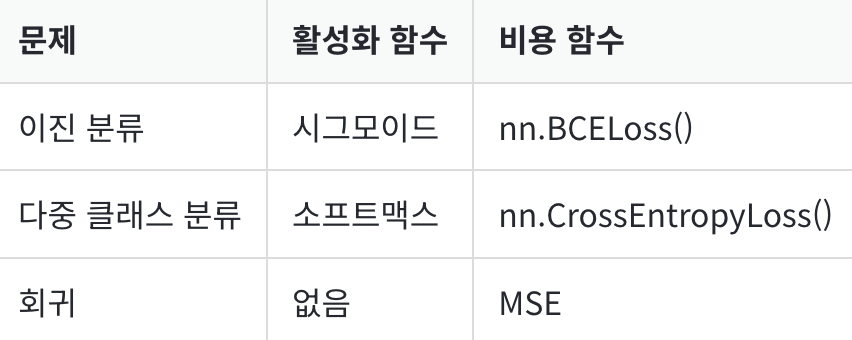

주의할 점은 nn.CrossEntropyLoss()는 소프트맥스 함수를 이미 포함하고 있습니다.



## 06-07 다층 퍼셉트론으로 손글씨 분류하기
이번 챕터에서는 다층 퍼셉트론을 구현하고, 딥 러닝을 통해서 숫자 필기 데이터를 분류해봅시다.

MNIST 데이터랑 다른 데이터입니다.

### 1. 숫자 필기 데이터 소개
숫자 필기 데이터는 사이킷런 패키지에서 제공하는 분류용 예제 데이터입니다. 0부터 9까지의 숫자를 손으로 쓴 이미지 데이터로 load_digits() 명령으로 로드할 수 있습니다. 각 이미지는 0부터 15까지의 명암을 가지는 8 × 8 = 64 픽셀 해상도의 흑백 이미지입니다. 그리고 해당 이미지가 1,797개가 있습니다.

load_digits()를 통해 이미지 데이터를 로드할 수 있습니다. 로드한 전체 데이터를 digits에 저장합니다.

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

첫번째 샘플을 출력해보겠습니다. .images[인덱스]를 사용하면 해당 인덱스의 이미지를 행렬로서 출력할 수 있습니다.

In [25]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


첫번째 샘플이 8 × 8 행렬로 출력된 것을 볼 수 있습니다. 0을 흰색 도화지, 0보다 큰 숫자들을 검은색 점이라고 상상해보면 숫자 0의 실루엣처럼 보입니다. 실제로 레이블도 숫자 0인지 첫번째 샘플의 레이블을 확인해봅시다.

In [26]:
print(digits.target[0])

0


첫번째 샘플의 레이블은 0인 것을 확인할 수 있습니다.
전체 샘플 중에서 상위 5개의 샘플만 시각화해봅시다.

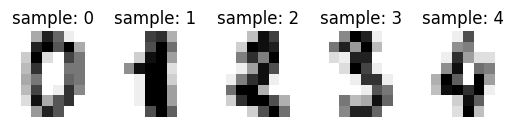

In [27]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

이제 훈련 데이터와 레이블을 각각 X, Y에 저장해봅시다. digits.images는 모든 샘플을 8 × 8 행렬로 저장하고 있습니다. 더 나은 방법은 digts.data를 사용하는 것입니다. 이는 8 × 8 행렬을 전부 64차원의 벡터로 변환해서 저장한 상태입니다. digits.data를 이용해서 첫번째 샘플을 출력해보겠습니다.

In [28]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


이를 X로 저장하고, 레이블을 Y에 저장합니다.

In [29]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

## 2. 다층 퍼셉트론 분류기 만들기

In [30]:
import torch
import torch.nn as nn
from torch import optim

In [31]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [32]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [33]:
loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.

In [34]:
optimizer = optim.Adam(model.parameters())

In [35]:
losses = []

In [36]:
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X) # forward 연산
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, 100, loss.item()
    ))

  losses.append(loss.item())

Epoch    0/100 Cost: 2.381846
Epoch   10/100 Cost: 2.086940
Epoch   20/100 Cost: 1.844468
Epoch   30/100 Cost: 1.555474
Epoch   40/100 Cost: 1.246410
Epoch   50/100 Cost: 0.968091
Epoch   60/100 Cost: 0.724376
Epoch   70/100 Cost: 0.519714
Epoch   80/100 Cost: 0.380598
Epoch   90/100 Cost: 0.293385


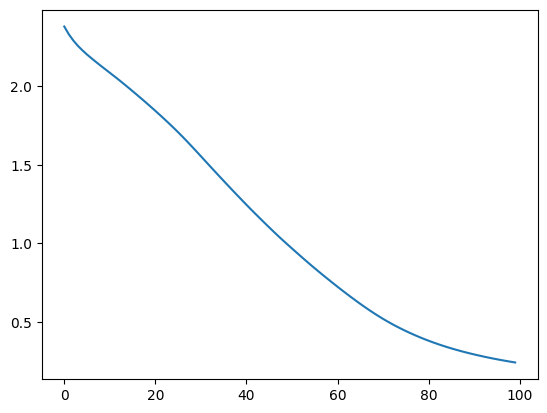

In [37]:
plt.plot(losses)

## 06-08 다층 퍼셉트론으로 MNIST 분류하기
이번 챕터에서는 은닉층을 추가로 넣어 다층 퍼셉트론을 구현하고, 딥 러닝을 통해서 MNIST 데이터를 분류해봅시다.

<br>
<br>

### 1. 데이터 로드하기

MNIST 데이터셋을 불러옵니다. cache=True는 다운로드한 데이터를 로컬 디스크에 저장하여 다음 호출 때 빠르게 로드합니다.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [42]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


레이블 데이터 타입을 정수형으로 변환합니다.

In [43]:
mnist.target = mnist.target.astype(np.int8)

모든 이미지 데이터를 0-255 범위에서 0-1 범위로 정규화합니다. 이는 학습 효율을 높이기 위해 수행합니다. 레이블 데이터를 y에 저장합니다.

In [44]:
X = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

In [45]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

첫 번째 MNIST 데이터 샘플을 시각화하고 해당 이미지의 레이블을 출력합니다.



이 이미지 데이터의 레이블은 5이다


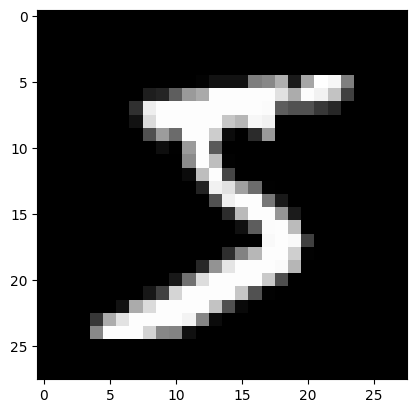

In [46]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

2. 훈련 데이터와 테스트 데이터의 분리


In [47]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

데이터를 훈련 데이터와 테스트 데이터로 분할합니다.



In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)


 데이터를 PyTorch의 텐서로 변환 후, TensorDataset을 사용하여 데이터셋을 구성합니다. 이 데이터셋을 DataLoader에 적용하여 미니 배치 학습이나 추론 시 편리하게 데이터를 로드할 수 있게 합니다.

In [49]:
# 텐서로 변환
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# TensorDataset 객체 생성
ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

# DataLoader 객체 생성
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

## 3. 다층 퍼셉트론
이 코드는 784(28x28)개의 입력 뉴런, 100개의 은닉 뉴런, 그리고 10개의 출력 뉴런(0~9)을 가지는 다층 퍼셉트론을 구성합니다. ReLU 활성화 함수를 사용하여 비선형성을 추가하고, 최종 출력은 10개의 클래스에 대한 점수를 제공합니다.

In [50]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


여기에서는 크로스 엔트로피 손실 함수를 사용하여 모델의 예측과 실제 레이블 사이의 차이를 계산합니다. Adam 최적화 기법을 사용하여 모델의 가중치를 업데이트합니다.

In [51]:
from torch import optim

# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.01)

train 함수는 모델을 훈련 모드로 설정하고, 데이터 로더에서 미니배치를 하나씩 꺼내 모델을 훈련합니다. 손실을 계산하고 역전파를 통해 그래디언트를 계산한 다음, 최적화기를 사용하여 가중치를 업데이트합니다

In [52]:
def train(epoch):
    model.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer.zero_grad()  # 경사를 0으로 초기화
        outputs = model(data)  # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets)  # 출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward()  # 오차를 역전파 계산
        optimizer.step()  # 역전파 계산한 값으로 가중치를 수정

    print("epoch{}：완료\n".format(epoch))

test 함수는 모델을 평가하기 위해 추론 모드로 설정하고, 데이터 로더를 통해 테스트 데이터에 대한 예측을 수행합니다. 예측된 클래스와 실제 클래스를 비교하여 정확도를 계산합니다.

In [53]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [54]:
test()


테스트 데이터에서 예측 정확도: 972/10000 (10%)



In [55]:
for epoch in range(3):
    train(epoch)

test()

epoch0：완료

epoch1：완료

epoch2：완료


테스트 데이터에서 예측 정확도: 9589/10000 (96%)



## 06-09 과적합(Overfitting)을 막는 방법들
학습 데이터에 모델이 과적합되는 현상은 모델의 성능을 떨어트리는 주요 이슈입니다. 모델이 과적합되면 훈련 데이터에 대한 정확도는 높을지라도, 새로운 데이터. 즉, 검증 데이터나 테스트 데이터에 대해서는 제대로 동작하지 않습니다. 이는 모델이 학습 데이터를 불필요할정도로 과하게 암기하여 훈련 데이터에 포함된 노이즈까지 학습한 상태라고 해석할 수 있습니다. 이번 챕터에서는 모델의 과적합을 막을 수 있는 여러가지 방법에 대해서 논의합니다.

### 1. 데이터의 양을 늘리기
모델은 데이터의 양이 적을 경우, 해당 데이터의 특정 패턴이나 노이즈까지 쉽게 암기하기 되므로 과적합 현상이 발생할 확률이 늘어납니다. 그렇기 때문에 데이터의 양을 늘릴 수록 모델은 데이터의 일반적인 패턴을 학습하여 과적합을 방지할 수 있습니다.

만약, 데이터의 양이 적을 경우에는 의도적으로 기존의 데이터를 조금씩 변형하고 추가하여 데이터의 양을 늘리기도 하는데 이를 데이터 증식 또는 증강(Data Augmentation)이라고 합니다. 이미지의 경우에는 데이터 증식이 많이 사용되는데 이미지를 돌리거나 노이즈를 추가하고, 일부분을 수정하는 등으로 데이터를 증식시킵니다.



### 2. 모델의 복잡도 줄이기
인공 신경망의 복잡도는 은닉층(hidden layer)의 수나 매개변수의 수 등으로 결정됩니다. 과적합 현상이 포착되었을 때, 인공 신경망 모델에 대해서 할 수 있는 한 가지 조치는 인공 신경망의 복잡도를 줄이는 것 입니다.

In [56]:
class Architecture1(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Architecture1, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.relu = nnReLU()
    self.fc3 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    out = self.relu(out)
    out = self.fc3(out)
    return out

인공 신경망은 3개의 선형 레이어(Linear)를 가지고 있습니다. 위 인공 신경망이 입력 데이터에 과적합 현상을 보인다면, 다음과 같이 인공 신경망의 복잡도를 줄일 수 있습니다.

In [57]:
class Architecture1(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Architecture1, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

## 3. 가중치 규제(Regularization) 적용하기
복잡한 모델이 간단한 모델보다 과적합될 가능성이 높습니다. 그리고 간단한 모델은 적은 수의 매개변수를 가진 모델을 말합니다. 복잡한 모델을 좀 더 간단하게 하는 방법으로 가중치 규제(Regularizaiton)가 있습니다.

L1 규제 : 가중치 w들의 절대값 합계를 비용 함수에 추가합니다. L1 노름이라고도 합니다.
L2 규제 : 모든 가중치 w들의 제곱합을 비용 함수에 추가합니다. L2 노름이라고도 합니다.

L1 규제는 기존의 비용 함수에 모든 가중치에 대해서
를 더 한 값을 비용 함수로 하고, L2 규제는 기존의 비용 함수에 모든 가중치에 대해서

를 더 한 값을 비용 함수로 합니다.
는 규제의 강도를 정하는 하이퍼파라미터입니다.

L2 규제는 L1 규제와는 달리 가중치들의 제곱을 최소화하므로 w의 값이 완전히 0이 되기보다는 0에 가까워지기는 경향을 띕니다. L1 규제는 어떤 특성들이 모델에 영향을 주고 있는지를 정확히 판단하고자 할 때 유용합니다. 만약, 이런 판단이 필요없다면 경험적으로는 L2 규제가 더 잘 동작하므로 L2 규제를 더 권장합니다. 인공 신경망에서 L2 규제는 가중치 감쇠(weight decay)라고도 부릅니다.

파이토치에서는 옵티마이저의 weight_decay 매개변수를 설정하므로서 L2 규제를 적용합니다. weight_decay 매개변수의 기본값은 0입니다. weight_decay 매개변수에 다른 값을 설정할 수도 있습니다.

In [58]:
model = Architecture1(10, 20, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

## 4. 드롭아웃(Dropout)
드롭아웃은 학습 과정에서 신경망의 일부를 사용하지 않는 방법입니다.

예를 들어 드롭아웃의 비율을 0.5로 한다면 학습 과정마다 랜덤으로 절반의 뉴런을 사용하지 않고, 절반의 뉴런만을 사용합니다.

드롭아웃은 신경망 학습 시에만 사용하고, 예측 시에는 사용하지 않는 것이 일반적입니다. 학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지해주고, 매번 랜덤 선택으로 뉴런들을 사용하지 않으므로 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합을 방지합니다.

# 06-10 기울기 소실(Gradient Vanishing)과 폭주(Exploding)
깊은 인공 신경망을 학습하다보면 역전파 과정에서 입력층으로 갈 수록 기울기(Gradient)가 점차적으로 작아지는 현상이 발생할 수 있습니다. 입력층에 가까운 층들에서 가중치들이 업데이트가 제대로 되지 않으면 결국 최적의 모델을 찾을 수 없게 됩니다. 이를 기울기 소실(Gradient Vanishing)이라고 합니다.

반대의 경우도 있습니다. 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산되기도 합니다. 이를 기울기 폭주(Gradient Exploding)이라고 하며, 뒤에서 배울 순환 신경망(Recurrent Neural Network, RNN)에서 발생할 수 있습니다.

이번 챕터에서는 기울기 소실 또는 기울기 폭주를 막는 방법들에 대해서 다룹니다.

### 1. ReLU와 ReLU의 변형들
앞에서 배운 내용을 간단히 복습해봅시다. 시그모이드 함수를 사용하면 입력의 절대값이 클 경우에 시그모이드 함수의 출력값이 0 또는 1에 수렴하면서 기울기가 0에 가까워집니다. 그래서 역전파 과정에서 전파 시킬 기울기가 점차 사라져서 입력층 방향으로 갈 수록 제대로 역전파가 되지 않는 기울기 소실 문제가 발생할 수 있습니다.

기울기 소실을 완화하는 가장 간단한 방법은 은닉층의 활성화 함수로 시그모이드나 하이퍼볼릭탄젠트 함수 대신에 ReLU나 ReLU의 변형 함수와 같은 Leaky ReLU를 사용하는 것입니다.

은닉층에서는 시그모이드 함수를 사용하지 마세요.
Leaky ReLU를 사용하면 모든 입력값에 대해서 기울기가 0에 수렴하지 않아 죽은 ReLU 문제를 해결합니다.
은닉층에서는 ReLU나 Leaky ReLU와 같은 ReLU 함수의 변형들을 사용하세요.

### 2. 가중치 초기화(Weight initialization)
같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌느냐에 따라서 모델의 훈련 결과가 달라지기도 합니다. 다시 말해 가중치 초기화만 적절히 해줘도 기울기 소실 문제과 같은 문제를 완화시킬 수 있습니다.

### 3. 배치 정규화(Batch Normalization)
ReLU 계열의 함수와 He 초기화를 사용하는 것만으로도 어느 정도 기울기 소실과 폭주를 완화시킬 수 있지만, 이 두 방법을 사용하더라도 훈련 중에 언제든 다시 발생할 수 있습니다. 기울기 소실이나 폭주를 예방하는 또 다른 방법은 배치 정규화(Batch Normalization)입니다. 배치 정규화는 인공 신경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 만듭니다.



#### 1. 내부 공변량 변화(Internal Covariate Shift)
배치 정규화를 이해하기 위해서는 내부 공변량 변화(Internal Covariate Shift)를 이해할 필요가 있습니다. 내부 공변량 변화란 학습 과정에서 층 별로 입력 데이터 분포가 달라지는 현상을 말합니다. 이전 층들의 학습에 의해 이전 층의 가중치 값이 바뀌게 되면, 현재 층에 전달되는 입력 데이터의 분포가 현재 층이 학습했던 시점의 분포와 차이가 발생합니다. 배치 정규화를 제안한 논문에서는 기울기 소실/폭주 등의 딥 러닝 모델의 불안전성이 층마다 입력의 분포가 달라지기 때문이라고 주장합니다.


#### 2. 배치 정규화(Batch Normalization)
배치 정규화(Batch Normalization)는 표현 그대로 한 번에 들어오는 배치 단위로 정규화하는 것을 말합니다. 배치 정규화는 각 층에서 활성화 함수를 통과하기 전에 수행됩니다. 배치 정규화를 요약하면 다음과 같습니다. 입력에 대해 평균을 0으로 만들고, 정규화를 합니다. 그리고 정규화 된 데이터에 대해서 스케일과 시프트를 수행합니다. 이 때 두 개의 매개변수 γ와 β를 사용하는데, γ는 스케일을 위해 사용하고, β는 시프트를 하는 것에 사용하며 다음 레이어에 일정한 범위의 값들만 전달되게 합니다.